<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Libraries</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import geopandas as gpd
import matplotlib.colors as colors

<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Project</div>

Primary energy consumption - An indicator for energy demand  

Primary energy consumption provides information about the total amount of energy needed to power the different economic sectors and activities (households, industry, transport). More precisely, it reflects how much energy we need for our daily electricity consumption. 


<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">The Data</div>

The dataset contains a wide range of information on energy consumption, energy production, energy sources, and other related variables. It covers several countries and time periods, allowing comparisons to be made over time and across countries.  


<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Data Preprocessing</div>

In [2]:
# reads the csv file
world_energy = pd.read_csv('owid-energy-data.csv')

In [3]:
# filters necessary columns
world_energy = world_energy[['iso_code', 'country', 'year', 'population', 'gdp', 'biofuel_cons_per_capita', 'coal_cons_per_capita', 
                             'energy_per_gdp', 'energy_per_capita',  'gas_energy_per_capita', 'hydro_energy_per_capita', 'oil_energy_per_capita',  
                             'low_carbon_energy_per_capita', 'nuclear_energy_per_capita', 'other_renewables_energy_per_capita', 'primary_energy_consumption',
                              'per_capita_electricity', 'renewables_elec_per_capita', 'solar_energy_per_capita', 'wind_energy_per_capita']]


# sorting the countries by continent
country_to_continent = {'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia',
                                 'China', 'East Timor', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
                                'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Macao', 'Malaysia', 'Maldives', 'Mongolia', 
                                'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia',
                                'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand',
                                'Turkey', 'Uzbekistan', 'Turkmenistan', 'United Arab Emirates', 'Vietnam', 'Yemen'],
                                    
                        'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 
                                   'Comoros', 'Congo', "Cote d'Ivoire",  'Djibouti', 'Egypt',  'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 
                                   'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi',  'Mali', 
                                   'Martinique', 'Mauritania', 'Mauritius',  'Montserrat', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
                                     'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 
                                     'Sudan',  'Tanzania',  'Togo',  'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Democratic Republic of Congo'],

                        'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'French Guiana', 'Paraguay', 'Peru',
                                           'Suriname', 'Uruguay', 'Venezuela'],

                        'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Cayman Islands', 'Cayman Islands', 'Costa Rica', 
                                          'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Greenland', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 
                                          'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Puerto Rico', "Saint Kitts and Nevis", "Saint Vincent and the Grenadines", 
                                          'Saint Lucia', 'Trinidad and Tobago', 'United States', 'United States Virgin Islands'],

                        'Europe': ['Albania', 'Austria', 'Belgium', 'Belarus', 'Bulgaria', 'Bosnia and Herzegovina', 'British Virgin Islands', 'Bulgaria', 'Croatia', 'Czechia',
                                    'Cyprus', 'Denmark', 'Estonia', 'Finland', 'Faroe Islands', 'France', 'Georgia', 'Germany', 'Greece',  'Gibraltar', 
                                    'Hungary', 'Ireland', 'Italy', 'Iceland', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Montenegro',
                                      'Netherlands', 'Netherlands Antilles', 'New Caledonia', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 
                                      'Serbia', 'Serbia and Montenegro', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'],

                        'Oceania': ['Australia', 'Cook Islands', 'Fiji', 'Kiribati', 'Micronesia (country)', 'Nauru', 'New Zealand', 'Papua New Guinea', 
                                    'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu', 'French Polynesia', 'Northern Mariana Islands','Niue',
                                    'American Samoa','Guam']
                        }

# creates a list of non-countries
non_countries = ['Africa', 'Africa (BP)', 'Africa (Ember)', 'Africa (Shift)','Asia Pacific (BP)', 'Antarctica','Asia and Oceania (Shift)', 
                 'Australia and New Zealand (EIA)','CIS (BP)', 'Central & South America (EIA)', 'Central America (BP)','Central and South America (Shift)',
                 'EU28 (Shift)', 'East Germany (EIA)', 'Eastern Africa (BP)',' Eurasia (EIA)', 'Eurasia (Shift)','Europe', 'Europe (BP)',
                 'Europe (Ember)', 'Europe (Shift)', 'European Union (27)', 'European Union (27) (Ember)', 'European Union (EIA)',
                 'G20 (Ember)', 'G7 (Ember)', 'Hawaiian Trade Zone (EIA)', 'High-income countries', 'Africa (EIA)','IEO - Middle East (EIA)',
                 'IEO OECD - Europe (EIA)', 'Inde (Shift)', 'Latin America and Caribbean (Ember)','Low-income countries', 'Lower-middle-income countries',
                 'Mexico, Chile, and other OECD Americas (EIA)', 'Middle Africa (BP)', 'Middle East (BP)', 'Middle East (EIA)', 'Middle East (Shift)',
                 'Non-OECD (BP)', 'Non-OECD (EIA)', 'Non-OPEC (EIA)','North America', 'North America (BP)', 'North America (Ember)','North America (Shift)',
                 'OECD (BP)', 'OECD (EIA)', 'OECD (Ember)', 'OECD (Shift)', 'OECD - Asia And Oceania (EIA)','OECD - Europe (EIA)', 
                 'OECD - North America (EIA)', 'OPEC (EIA)', 'OPEC (Shift)', 'OPEC - Africa (EIA)','OPEC - South America (EIA)',
                 'Oceania', 'Oceania (Ember)','Other Non-OECD - America (EIA)', 'Other Non-OECD - Asia (EIA)', 'Other Non-OECD - Europe and Eurasia (EIA)',
                 'Persian Gulf (EIA)', 'Persian Gulf (Shift)', 'South America', 'South Korea and other OECD Asia (EIA)',
                 'South and Central America (BP)', 'Total Non-OPEC (BP)', 'Total OPEC (BP)', 'U.S. Pacific Islands (EIA)',
                 'U.S. Pacific Islands (Shift)', 'U.S. Territories (EIA)', 'U.S. Territories (Shift)', 'USSR',
                 'Upper-middle-income countries', 'Wake Island (EIA)', 'Wake Island (Shift)', 'West Germany (EIA)','Western Africa (BP)', 
                 'Czechoslovakia', 'Western Sahara', 'Reunion', 'Saint Pierre and Miquelon', 'Turks and Caicos Islands', 'Saint Helena',  
                 'Aruba', 'Bermuda',  'Falkland Islands', 'Guadeloupe', 'Montserrat', 'Asia', 'Asia & Oceania (EIA)', 'Asia (Ember)', 
                 'Eurasia (EIA)', 'Hawaiian Trade Zone (EIA)', 'IEO - Africa (EIA)', 'Yugoslavia', 'World']


In [4]:
# Removes non-countries from the dataframe
world_energy = world_energy[~world_energy['country'].isin(non_countries)]

# Adds a column with the continent for each country
world_energy['continent'] = world_energy['country'].apply(
    lambda x: next((continent for continent, countries in country_to_continent.items() if x in countries), None))

# checks for countries that are not in the dictionary
world_energy[world_energy['continent'].isnull()]['country'].unique()

array([], dtype=object)

### preprocessing a dataframe for Plot 1 

In [5]:
# creates a dataframe with the data for the year 2019
pec_2019 = world_energy[world_energy['year'] == 2019]

# selects the columns that are needed
pec_2019 = pec_2019[['iso_code','country', 'energy_per_capita', 'continent', 'per_capita_electricity']]

# checks for countries with NaN
pec_2019[pec_2019['energy_per_capita'].isnull()]['country'].unique()

# dros the rows with NaN
pec_2019.dropna(inplace=True)

### preprocessing a dataframe for Plot 3, 4 & 5

In [6]:
# creates a column with the gdp per capita
world_energy['gdp_per_capita'] = world_energy['gdp'] / world_energy['population']

# creates a dataframes with needed columns
continent_data = world_energy[['iso_code', 'year', 'energy_per_capita', 'gdp_per_capita', 'continent']]

# drops the rows with NaN
continent_data_filtered = continent_data.dropna(subset=['energy_per_capita', 'gdp_per_capita'])

# groups the data by continent and year and calculates the mean
continent_data_filtered = continent_data_filtered.groupby(['continent', 'year']).mean(numeric_only=True).reset_index()

<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Primary Energy Consumption 2019</div>

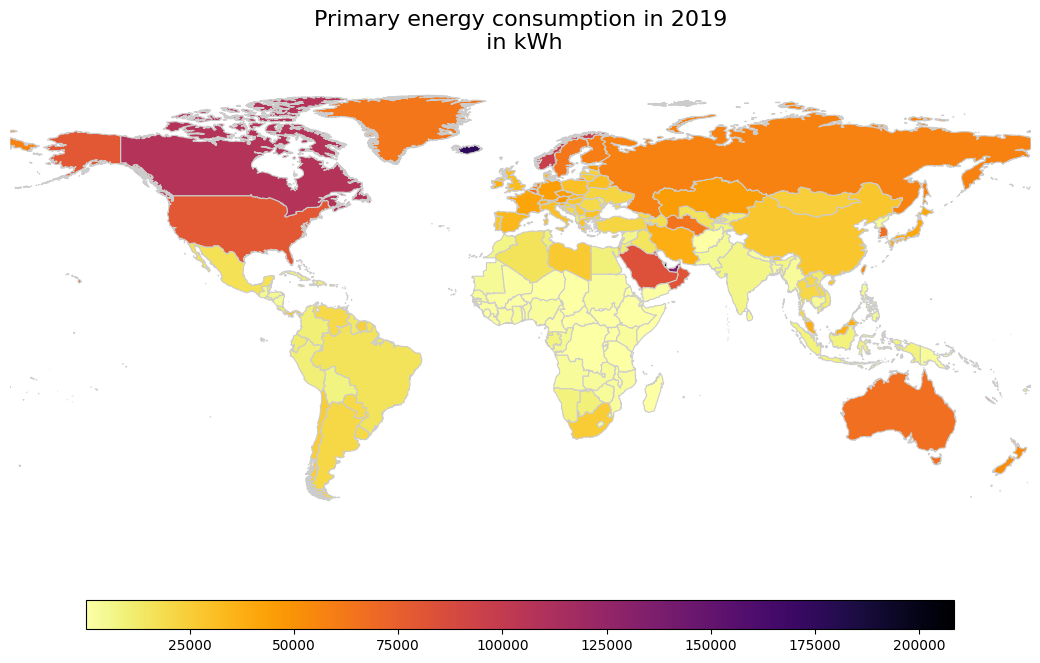

In [7]:
world_map = gpd.read_file('world-administrative-boundaries.shp') # reads the shapefile
merged_data = world_map.merge(pec_2019, left_on="iso3", right_on="iso_code", how="left") # merges the shapefile with the data pec_2019
merged_data['coords'] = merged_data['geometry'].apply(lambda x: x.representative_point().coords[:]) # creates a column with the coordinates of the countries
merged_data['coords'] = [coords[0] for coords in merged_data['coords']] # creates a loop to get the coordinates

# creates the figure and the axes
fig, ax = plt.subplots(figsize=(14, 8))                                                             # configures the size of the figure
ax.set_axis_off()                                                                                   # removes the axis
ax.set_title("Primary energy consumption in 2019\n in kWh", pad=20, fontsize=16, loc="center")      # adds a title to the figure
ax.set_xlim(-180, 180)                                                                              # sets the limits of the x axis
ax.set_ylim(-90, 90)                                                                                # sets the limits of the y axis


# creates a Heatmap to show the energy consumption per capita
cmap = 'inferno'                                                                                    # sets the color map
cmap_reversed = plt.get_cmap(cmap).reversed()                                                      # reverses the color map
vmin = merged_data['energy_per_capita'].min()                                                      # sets the minimum value of the color map
vmax = merged_data['energy_per_capita'].max()                                                     # sets the maximum value of the color map
norm = colors.Normalize(vmax=vmax, vmin=vmin)                                                     # normalizes the color map
merged_data.plot(column='energy_per_capita', cmap=cmap_reversed, linewidth=0.8, ax=ax, edgecolor='0.8',  # creates the heatmap
                 norm= norm, legend=True, legend_kwds={ 'shrink': 0.8, 'pad': 0.001, 'aspect': 30, 'orientation': "horizontal"}) # configures the legend



plt.show()

The world map illustrates primary energy consumption per capita from 2019.

<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Energy shares in the world</div>

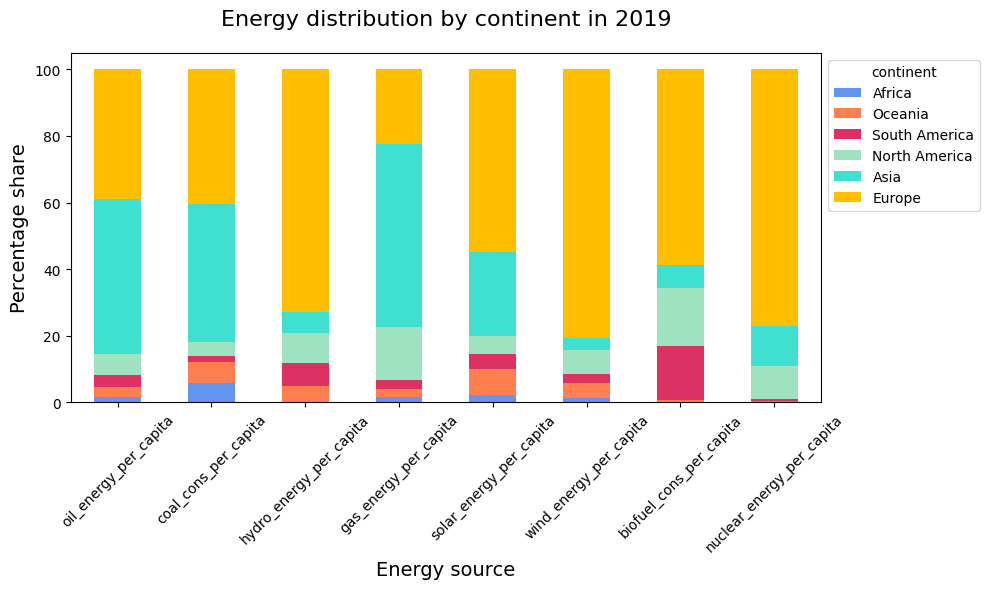

In [8]:
# creates function to get the energy consumption by continent for a given year
def get_energy_by_continent(year):
    energy = world_energy[world_energy['year'] == year]
    energy_by_continent = energy.groupby('continent').sum(numeric_only=True)
    return energy_by_continent

# creates a function to plot the energy consumption by continent for a given year
def plot_energy_by_continent(year):
    energy_by_continent = get_energy_by_continent(year)

    # creates a list with the energy sources
    energy_sources = ['oil_energy_per_capita', 'coal_cons_per_capita', 'hydro_energy_per_capita',
                      'gas_energy_per_capita', 'solar_energy_per_capita', 'wind_energy_per_capita',
                      'biofuel_cons_per_capita', 'nuclear_energy_per_capita']
    
    # creates a list with the continents in the order we want to plot them
    continent_order = ['Europe', 'Africa', 'Asia', 'Oceania', 'North America', 'South America']
    
    # sets the colors for each continent
    continent_colors = {'Europe': '#6495ED', 'Africa': '#FF7F50', 'Asia': '#DE3163', 'Oceania': '#9FE2BF',
                         'North America': '#40E0D0', 'South America': '#FFBF00'}
    
    # creates the figure and the axes
    fig, ax = plt.subplots(figsize=(10, 6))
    
    energy_by_source = energy_by_continent[energy_sources].T                                                                    # transposes the dataframe
    energy_by_source_percent = energy_by_source.div(energy_by_source.sum(axis=1), axis=0) * 100                                 # calculates the percentage of each energy source
    energy_by_source_percent = energy_by_source_percent.reindex(energy_by_source_percent.mean().sort_values().index, axis=1)    # sorts the columns by the mean of the values
    energy_by_source_percent.plot(kind='bar', stacked=True, ax=ax, color=[continent_colors.get(c) for c in continent_order])    # plots the data
    
    ax.set_xlabel('Energy source', fontsize=14)                                                                                 # sets the label of the x axis
    ax.set_ylabel('Percentage share', fontsize=14)                                                                              # sets the label of the y axis
    ax.set_title('Energy distribution by continent in {}'.format(year), fontsize=16, pad=20)                                    # sets the title of the figure
    ax.legend(title='continent', bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)                                          # sets the legend
    plt.xticks(rotation=45)                                                                                                     # rotates the x ticks
    plt.tight_layout()                                                                                                          # sets the layout of the figure
    plt.show()                                                                                                                  # shows the figure

plot_energy_by_continent(2019)                                                                                                  # plots the energy consumption by continent for the year 2019

This plot shows the percentage shares of the continents in different energy sources. It illustrates the diverse and varied use of energy resources at the continental level.


<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Devolopement of primary energy consumption</div>

In [9]:
# sets the colors for each continent
continent_colors = {
    'Africa': 'red',
    'Asia': 'blue',
    'Europe': 'green',
    'North America': 'orange',
    'Oceania': 'lightblue',
    'South America': 'black'
}

# creates a line chart to show the energy consumption per capita by continent
line = alt.Chart(continent_data_filtered).mark_line().encode(
    x=alt.X('year:O', title='Year', axis=alt.Axis(labelAngle=-45, labelOverlap=True)),          # sets the label angle and the label overlap
    y=alt.Y('energy_per_capita:Q', title='Primary consumption per capita in kWh'),             
    color=alt.Color('continent:N', legend=alt.Legend(title='continent'),                        # sets the color and the legend
                    scale=alt.Scale(domain=list(continent_colors.keys()),                       # sets the domain and the range of the colors
                                    range=list(continent_colors.values()))),  
    size=alt.Size(value= 3),                                                                    # sets the size of the line
)

# creates a circle chart to show the energy consumption per capita by continent
circle = alt.Chart(continent_data_filtered).mark_circle().encode(
    x=alt.X('year:O'),
    y=alt.Y('energy_per_capita:Q'),
    color=alt.Color('continent:N',  
                    scale=alt.Scale(domain=list(continent_colors.keys()), 
                                    range=list(continent_colors.values()))),
    size=alt.Size(value= 50),
    tooltip=['year','continent', 'energy_per_capita']
)

# creates the chart
chart = (line + circle).properties(
    title='Devolopment of primary energy consumption per capita',                           # sets the title
    width=1000,                                                                             # sets the width
    height=500                                                                              # sets the height
).configure_title(
    fontSize=25,                                                                            # sets the font size
    offset=35                                                                               # moves the title from the chart
).configure_axis(
    labelFontSize=14,                                                                       # sets the font size of the labels
    titleFontSize=14                                                                        # sets the font size of the title
).configure_legend(
    labelFontSize=14,
    titleFontSize=14
)

chart

alt.LayerChart(...)

The plot shows the development of primary energy consumption per capita over time for each continent to show the comparison and differences between the continents. 

<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">GDP per capita devolopement</div>

In [10]:
# sets the colors for each continent
continent_colors = {
    'Africa': 'red',
    'Asia': 'blue',
    'Europe': 'green',
    'North America': 'orange',
    'Oceania': 'lightblue',
    'South America': 'black'
}

# creates a line chart to show the GDP per capita by continent
line = alt.Chart(continent_data_filtered).mark_line().encode(
    x=alt.X('year:O', title='Year', axis=alt.Axis( tickCount=5, labelAngle=-45, labelOverlap=True)),
    y=alt.Y('gdp_per_capita:Q', title='GDP in Thd. US$'),
    color=alt.Color('continent:N', legend=alt.Legend(title='continent'),  
                    scale=alt.Scale(domain=list(continent_colors.keys()), 
                                    range=list(continent_colors.values()))),
    size=alt.Size(value= 3),
)

# creates a circle chart to show the GDP per capita by continent
circle = alt.Chart(continent_data_filtered).mark_circle().encode(
    x=alt.X('year:O'),
    y=alt.Y('gdp_per_capita:Q'),
    color=alt.Color('continent:N',  
                    scale=alt.Scale(domain=list(continent_colors.keys()), 
                                    range=list(continent_colors.values()))),
    size=alt.Size(value= 50),
    tooltip=['year','continent', 'gdp_per_capita']
)

# creates the chart
chart = (line + circle).properties(
    title='Devolopment of GDP per capita',
    width=1000,
    height=500
).configure_title(
    fontSize=25,
    offset=35
).configure_axis(
    labelFontSize=14,
    titleFontSize=14
).configure_legend(
    labelFontSize=14,
    titleFontSize=14
)

chart

alt.LayerChart(...)

<style> .section-title {background-color: #2ecc71; color: white; border-radius: 15px; text-align: center; padding: 1px; font-size: 2em}</style>
<div class="section-title">Primary Energy Consumption vs. GDP</div>

In [11]:
# defines the colors for the variables
variable_colors = {'gdp_per_capita': 'red', 'energy_per_capita': 'blue'}

# creates plots for each continent
continent_plots = []
for continent in continent_data_filtered['continent'].unique():

    
    subset = continent_data_filtered[continent_data_filtered['continent'] == continent].copy()                           # creates a subset of the data for each continent
    subset['year'] = pd.to_numeric(subset['year'])                                                                       # converts the year column to numeric
    subset = subset.sort_values('year').iloc[::len(subset['year']) // 18]                                                # selects every 18th year
    subset = pd.melt(subset, id_vars=['year'], value_vars=['gdp_per_capita', 'energy_per_capita'],                       # melt the data to long format
                     var_name='variable', value_name='value')
    

    # creates an area chart
    area = alt.Chart(subset).mark_area().encode(
        x=alt.X('year:O', axis=alt.Axis(title='year', labelAngle=-45), scale=alt.Scale(nice=False)),
        y=alt.Y('value:Q', axis=alt.Axis(title='gdp in Tsd $\n energy in kWh')),
        color=alt.Color('variable:N', 
                        scale=alt.Scale(domain=list(variable_colors.keys()), range=list(variable_colors.values())), 
                        legend=alt.Legend(title='values')),            
        tooltip=['year', 'value', 'variable']
    ).properties(
        title=continent,
        width=300,
        height=200
    )
    
    # adds the plot to the list
    continent_plots.append(area)


# combines the plots
top_row = alt.hconcat(continent_plots[0], continent_plots[1], continent_plots[2])
bottom_row = alt.hconcat(continent_plots[3], continent_plots[4], continent_plots[5])
grid_plot = alt.vconcat(top_row, bottom_row)

# adds a title for combined plot
grid_plot = grid_plot.properties(
    title={
        "text": "Energy consumption vs GDP",
        "fontSize": 24,
        "offset": 25,
        "anchor": "middle"
    }
)

# adjusts the title, axis and legend 
grid_plot = grid_plot.configure_title(
    fontSize=16,  
    anchor='middle'  
).configure_axis(
    labelFontSize=12,  
    titleFontSize=14  
).configure_legend(
    titleFontSize=16,
    labelFontSize=14  
)

# shows the plot
grid_plot

alt.VConcatChart(...)

In the area diagram shown, the development of GDP and energy consumption per capita over time is visualized. By directly comparing the two areas, possible correlations, and patterns can be analyzed. 
